In [2]:
!ls -l *.gz
!gunzip eigvals.pickle.gz
!ls -l eigvals.pickle

-rw-r--r--  1 yoavfreund  staff  310492 May  3 18:41 eigvals.pickle.gz
-rw-r--r--  1 yoavfreund  staff  761335 May  3 18:41 eigvals.pickle


In [3]:
import pickle
with open('eigvals.pickle','rb') as file:
    Eig=pickle.load(file)
type(Eig)

dict

In [5]:
Eig['SBSBSBSS_TMIN']

{'Eigvals': array([ 0.1907054 ,  0.23512854,  0.27417095,  0.30172872,  0.3289919 ,
         0.35337786,  0.37521127,  0.39621789,  0.41610786,  0.43370723,
         0.45030485,  0.46555472,  0.48041139,  0.49518404,  0.5078458 ,
         0.52004242,  0.53150212,  0.54273578,  0.55350874,  0.56373993]),
 'counts': 2540.0}

In [40]:
import pandas as pd
_c1=[]
_c2=[]
_c3=[]
_c4=[]
_count=[]
_region=[]
_meas=[]
for key in Eig:
    _region.append(key[:8])
    _meas.append(key[9:])
    row=Eig[key]
    _count.append(row['counts'])
    E=row['Eigvals']
    if type(E[0])!=np.float64:
        E=np.real(E)
    _c1.append(E[0])
    _c2.append(E[1])
    _c3.append(E[2])
    _c4.append(E[3])


df=pd.DataFrame({"region":_region,
              "meas":_meas,
              "count":_count,
              "c1":_c1,
              "c2":_c2,
              "c3":_c3,
              "c4":_c4,
             })

In [48]:
dfL=df[df['count']>1000]
print df.shape,dfL.shape

(1178, 7) (1128, 7)


In [60]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


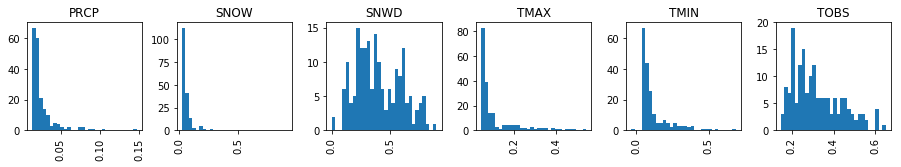

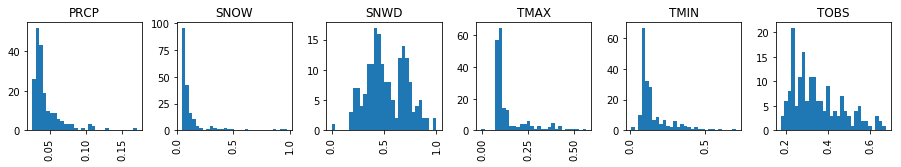

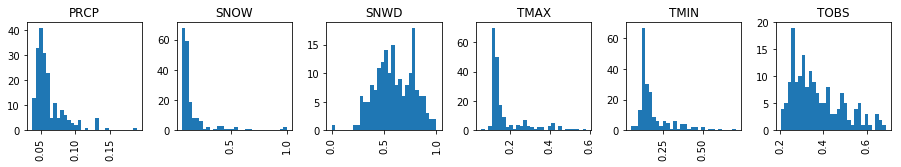

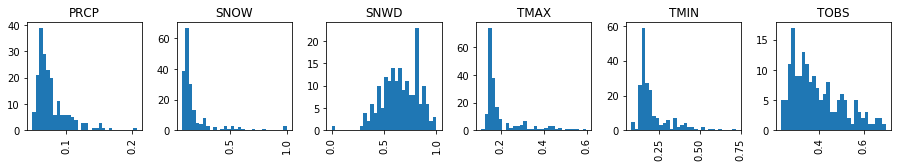

In [70]:
for col in ['c1','c2','c3','c4']:
    pd.DataFrame.hist(dfL,column=col,by='meas',figsize=(15,2),layout=(1,6),bins=30);

In [88]:
good_SNWD=dfL[(dfL['meas']=='SNWD')*(dfL['c2']>0.7)]

In [89]:
good_TOBS=dfL[(dfL['meas']=='TOBS')*(dfL['c2']>0.5)]

In [90]:
SNWD_regions=set(good_SNWD['region'])

In [91]:
TOBS_regions=set(good_TOBS['region'])

In [92]:
len(SNWD_regions),len(TOBS_regions)

(38, 22)

In [93]:
len(SNWD_regions.union(TOBS_regions))

42

In [94]:
good_SNWD

,c1,c2,c3,c4,count,meas,region
14,0.623325,0.712898,0.786040,0.823443,1098.0,SNWD,SBBBSBBB
36,0.654962,0.723279,0.770592,0.815801,1325.0,SNWD,SSSBSBBB
38,0.471115,0.723484,0.813169,0.854546,1996.0,SNWD,BSSSBSSS
222,0.630539,0.765022,0.881359,0.914924,1670.0,SNWD,BSBSSSSS
258,0.544344,0.739440,0.822873,0.889624,2232.0,SNWD,SSSSSSBB
266,0.607664,0.730812,0.783359,0.829643,1417.0,SNWD,BBBBBSBS
285,0.616517,0.791921,0.838369,0.878672,2134.0,SNWD,SSSSBSSB
322,0.618646,0.711298,0.770342,0.819133,1333.0,SNWD,BBBBSSBB
334,0.750032,0.981695,0.992775,0.998105,1592.0,SNWD,BSBSSSBS
341,0.892102,0.930256,0.959826,0.967942,1196.0,SNWD,SBBSSBSB


In [95]:
good_TOBS

,c1,c2,c3,c4,count,meas,region
12,0.498163,0.530674,0.550339,0.567056,1735.0,TOBS,SBSSBBSS
46,0.528184,0.551351,0.572722,0.584428,1286.0,TOBS,SSSSBSSB
144,0.499850,0.524784,0.548246,0.562869,1465.0,TOBS,SSSSBSBB
210,0.556211,0.584371,0.600651,0.612860,1405.0,TOBS,SBBSSSSS
249,0.546368,0.578054,0.597640,0.611934,1012.0,TOBS,SBSSSSBS
280,0.525673,0.545195,0.560990,0.574126,1506.0,TOBS,SBBSSSSB
305,0.648999,0.672138,0.688019,0.698778,1261.0,TOBS,SSSSBBSS
361,0.614940,0.646019,0.662022,0.673392,1270.0,TOBS,SSSBSBBS
401,0.542957,0.625980,0.640383,0.651927,1338.0,TOBS,SBSSSSSB
466,0.548924,0.573052,0.592080,0.606137,1650.0,TOBS,SSSBBSSB


In [99]:
i=0
for region in SNWD_regions.union(TOBS_regions):
    print region,i
    i+=1

BSBSBSBS 0
BSBSSSSB 1
SSSSSSBB 2
BSBSSSBS 3
SBBBBBSB 4
SSSBSBBB 5
BBSBSBSB 6
SSSBBBBB 7
SSSBSSBB 8
BSBSSSSS 9
BSBSSSBB 10
BBBBSSBB 11
SSSBSSSB 12
SSSBSBBS 13
SBSSBSBB 14
SSSSBSBB 15
SBBBBBBS 16
SSSBBSSB 17
SSSSBBSS 18
BSSSBSBS 19
SBSSBBBS 20
SBBSSBSS 21
SSSSBSSB 22
SSSSBBBB 23
SSSBSSSS 24
BSSSBSBB 25
SBBSSBSB 26
SBSBBSSB 27
BBBBBSBS 28
SBBBSBSS 29
BSSSBSSS 30
SBSSSBBB 31
SBSSBBSS 32
SBBBSBBB 33
SSSBBSBB 34
SBSBSBBS 35
SBBSSSSB 36
SBSSSSSB 37
SBSSSSBS 38
SBBSSSSS 39
BBBBBSSS 40
SBSSSBSS 41
